In [18]:
import sys
sys.path.insert(0,'../')
from Real_Kagome_Lattice_v2 import *

In [19]:
# for twist b.c. note that edge-to-edge hoppings have to be dealt with accordingly 
atom_index=0
atom_site=sites[atom_index] # [i1, i2, "0-1-2"]=[i1, i2, "A-B-C"]
print(atom_index,". Atom Site:",atom_site)

print("Neighborhoods:")
for delta in NN[atom_site[2]]: # All hoppings to neighbors for each type of atom (atom_site[2])
    neighbor_site = np.array(atom_site)+np.array(delta)
    neighbor_site[0] = neighbor_site[0]%l1
    neighbor_site[1] = neighbor_site[1]%l2    
    Bwrap = [False, False]
    if abs( neighbor_site[0] - atom_site[0] ) == l1-1 : Bwrap[0] = True
    if abs( neighbor_site[1] - atom_site[1] ) == l2-1 : Bwrap[1] = True

    neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
    print("Delta:",delta, ", Neighbor Site",neighbor_site, ", Neighbor No:",neighbor_no, Bwrap)
   

0 . Atom Site: [0, 0, 0]
Neighborhoods:
Delta: (0, 0, 1) , Neighbor Site [0 0 1] , Neighbor No: 1 [False, False]
Delta: (0, 0, 2) , Neighbor Site [0 0 2] , Neighbor No: 2 [False, False]
Delta: (-1, 0, 1) , Neighbor Site [2 0 1] , Neighbor No: 19 [True, False]
Delta: (0, -1, 2) , Neighbor Site [0 2 2] , Neighbor No: 8 [False, True]
Delta: (-1, 0, 2) , Neighbor Site [2 0 2] , Neighbor No: 20 [True, False]
Delta: (-1, 1, 1) , Neighbor Site [2 1 1] , Neighbor No: 22 [True, False]
Delta: (0, -1, 1) , Neighbor Site [0 2 1] , Neighbor No: 7 [False, True]
Delta: (1, -1, 2) , Neighbor Site [1 2 2] , Neighbor No: 17 [False, True]


In [20]:
H = np.zeros([N,N],dtype=complex)
def H_Theta(theta_1, theta_2):
    for atom_no in range(N):
        # check the algorithm for spesific atom_no 
        atom_site=sites[atom_no]
        for i_delta, delta in enumerate(NN[atom_site[2]]):
            neighbor_site = np.array(atom_site)+np.array(delta)
            neighbor_site[0] = neighbor_site[0]%l1
            neighbor_site[1] = neighbor_site[1]%l2
            neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
            Bwrap = [False, False]
            if abs( neighbor_site[0] - atom_site[0] ) == l1-1 : Bwrap[0] = True
            if abs( neighbor_site[1] - atom_site[1] ) == l2-1 : Bwrap[1] = True
            twist_1 = np.exp( 1j * theta_1 / (l1-2) * (abs( neighbor_site[0] - atom_site[0] )-1 ) * np.sign(neighbor_site[0] - atom_site[0]) )
            twist_2 = np.exp( 1j * theta_2 / (l2-2) * (abs( neighbor_site[1] - atom_site[1] )-1 ) * np.sign(neighbor_site[1] - atom_site[1]) )
            #print(atom_site, neighbor_site, Bwrap, twist_1, twist_2)
            #print(atom_no, "->",neighbor_no, Bwrap, twist_1, twist_2)
                        
            H[neighbor_no,atom_no] = twist_1 * twist_2 * hopps[atom_site[2]][i_delta]
    return H

In [21]:
# Reciprocal Vectors
b1x = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * a2_vec[1]
b1y = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * -a2_vec[0]
b2x = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * -a1_vec[1]
b2y = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * a1_vec[0]
b11=np.array([b1x,b1y]) 
b22=np.array([b2x,b2y]) 

# Twisted Angle Space Mesh = FBZ Mesh
theta_size = 5
q1_list = np.arange(0,theta_size) / theta_size
q2_list =  np.arange(0,theta_size) / theta_size
T = []
for q1 in q1_list:
    for q2 in q2_list:
        T.append(q1*b11+q2*b22)
T = np.array(T)
theta_1 = T[:,0];
theta_2=T[:,1]

#theta_size=10
d1 = 0.62831853 #Delta \theta_1 
d2 = 0.72551975 #Delta \theta_2

In [22]:
# Bizim her zaman üç bandımız var ve her boyutta üç adet chern sayımız çıkacak.
# 16'şar defa (l1=l2=4) enerjilerinin dejenere çıkması lazım. Çünkü o multiplerden chern hesaplayacağız.
w1, v1 = np.linalg.eigh(H_Theta(theta_1[5], theta_2[7]))
print(w1)

[-2.7967734  -2.77686932 -2.77652276 -2.76202828 -2.76154924 -2.75809264
 -2.75746314 -2.75650678 -2.75641544 -0.39415366 -0.39279149  0.16045737
  0.16716847  0.25602787  0.28600095  0.43864428  0.46037014  1.11054557
  1.68622783  2.29613665  2.31777115  2.47146219  2.50206477  2.59438077
  2.60157091  3.16931425  3.17102298]


In [23]:
N1= len(theta_1)
N2= len(theta_2)

EEA=np.zeros([N1,N2,N])
UUA=np.zeros([N1,N2,N,N],dtype=complex)
for it1 in range(N1):
    for it2 in range(N2):
         EEA[it1,it2,:],UUA[it1,it2,:,:] = np.linalg.eigh(H_Theta(theta_1[it1], theta_2[it2]) )
         # sort
         idx = np.argsort(EEA[it1,it2,:])
         UUA[it1,it2,:,:] = UUA[it1,it2,:,idx]

In [24]:
#%run ../../Chern_parameter_space_sum.ipynb

In [25]:
EEA[0,0,:]

array([-2.8       , -2.77779455, -2.77779455, -2.75777438, -2.75777438,
       -2.75777438, -2.75777438, -2.75777438, -2.75777438, -0.42220545,
       -0.42220545,  0.30352197,  0.30352197,  0.30352197,  0.30352197,
        0.30352197,  0.30352197,  1.12287187,  1.67712813,  2.45425241,
        2.45425241,  2.45425241,  2.45425241,  2.45425241,  2.45425241,
        3.2       ,  3.2       ])

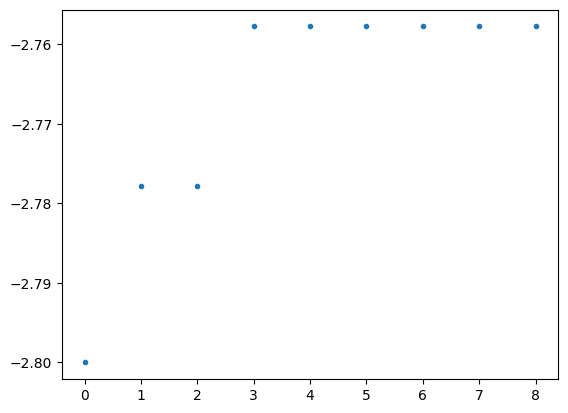

In [26]:
plt.plot( EEA[0,0,:9].flatten(), '.' )

In [29]:
def calc_link_var(ψk1, ψk2):
    #return np.exp( 1j*np.angle( np.dot(np.conj(ψk1),ψk2) ) )
    #s = np.dot(np.conj(ψk1),ψk2)
    s = np.linalg.det(np.matmul(np.conjugate(np.transpose(ψk1)), ψk2))
    return s/np.absolute(s)

def calc_link_vars_BZ(UUA):
    N1, N2 = UUA.shape[0:2]
    UU=np.zeros([N1,N2,2],dtype=complex)
    dirs = [[1,0], [0,1]]
    for i1 in range(N1):
        for i2 in range(N2):
            for idir, vdir in enumerate(dirs):
                    UU[i1,i2,idir] = calc_link_var(UUA[i1                   ,i2               ,:,:],
                                                   UUA[np.mod(i1+vdir[0],N1),np.mod(i2+vdir[1],N2),:,:])
    return UU        

def calc_F12_BZ(UU):
    return np.log( UU[:,:,0]*
                   np.roll(UU[:,:,1],-1,axis=0)*
                   np.conj(np.roll(UU[:,:,0],-1,axis=1)*
                   UU[:,:,1]) )

In [33]:
UU = calc_link_vars_BZ(UUA[:,:,:,0:9])
F12 = calc_F12_BZ(UU)
print(f'{F12.sum()/(2j*np.pi):.2e}')

-9.00e+00+5.12e-16j
